In [1]:
import os
import pandas as pd
import numpy as np


# Molecule parser

In [2]:
from parser import Molecule

/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_67944/1242124313.py:1: DeprecationWarning: The parser module is deprecated and will be removed in future versions of Python
  from parser import Molecule


ImportError: cannot import name 'Molecule' from 'parser' (/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload/parser.cpython-39-darwin.so)

In [3]:
# Filter out key-value pairs where the value contains 'H'
# filtered_label_mapping = {k: v for k, v in label_mapping.items() if 'H' not in v}
filtered_label_mapping = {'C4*': 'C_sugar',
 'O1P': 'O_backbone',
 'C2*': 'C_sugar',
 'C5': 'C_nucleobase',
 'O6': 'O_nucleobase',
 'C6': 'C_nucleobase',
 'C2': 'C_nucleobase',
 'C5*': 'C_sugar',
 'C1*': 'C_sugar',
 'C5M': 'C_nucleobase',
 'O5*': 'O_sugar',
 'P': 'P_backbone',
 'O4*': 'O_sugar',
 'O2': 'O_nucleobase',
 'N3': 'N_nucleobase',
 'C3*': 'C_sugar',
 'N1': 'N_nucleobase',
 'N4': 'N_nucleobase',
 'N9': 'N_nucleobase',
 'C4': 'C_nucleobase',
 'N7': 'N_nucleobase',
 'O2P': 'O_backbone',
 'C': 'C_nucleobase',
 'N2': 'N_nucleobase',
 'N': 'N_nucleobase',
 'O3*': 'O_sugar',
 'O4': 'O_nucleobase',
 'C8': 'C_nucleobase',
 'N6': 'N_nucleobase',
 'O': 'O_nucleobase'}

In [4]:
# Filter out key-value pairs where the value contains 'H'
# filtered_label_mapping = {k: v for k, v in label_mapping.items() if 'H' not in v}
filtered_label_mapping = {'C4*': 'C_sugar',
 'O1P': 'O_backbone',
 'C2*': 'C_sugar',
 'C5': 'C_nucleobase',
 'O6': 'O_nucleobase',
 'C6': 'C_nucleobase',
 'C2': 'C_nucleobase',
 'C5*': 'C_sugar',
 'C1*': 'C_sugar',
 'C5M': 'C_nucleobase',
 'O5*': 'O_sugar',
 'P': 'P_backbone',
 'O4*': 'O_sugar',
 'O2': 'O_nucleobase',
 'N3': 'N_nucleobase',
 'C3*': 'C_sugar',
 'N1': 'N_nucleobase',
 'N4': 'N_nucleobase',
 'N9': 'N_nucleobase',
 'C4': 'C_nucleobase',
 'N7': 'N_nucleobase',
 'O2P': 'O_backbone',
 'C': 'C_nucleobase',
 'N2': 'N_nucleobase',
 'N': 'N_nucleobase',
 'O3*': 'O_sugar',
 'O4': 'O_nucleobase',
 'C8': 'C_nucleobase',
 'N6': 'N_nucleobase',
 'O': 'O_nucleobase',
"C2'": 'C_sugar',
 "C4'": 'C_sugar',
 'H1': 'H_nucleobase',
 'H42': 'H_nucleobase',
 "H5''": 'H_sugar',
 'H3': 'H_nucleobase',
 "HO3'": 'H_sugar',
 "O4'": 'O_sugar',
'C7': 'C_nucleobase',
 'H73': 'H_nucleobase',
 "H2''": 'H_sugar',
 "HO5'": 'H_sugar',
 'H5': 'H_nucleobase',
 "H5'": 'H_sugar',
 'H41': 'H_nucleobase',
 'H21': 'H_nucleobase',
 'H2': 'H_nucleobase',
 "C5'": 'C_sugar',
 'H22': 'H_nucleobase',
 'H71': 'H_nucleobase',
 "H3'": 'H_sugar',
 'H8': 'H_nucleobase',
 'OP1': 'O_backbone',
 'H72': 'H_nucleobase',
 'H61': 'H_nucleobase',
 'OP2': 'O_backbone',
 "H1'": 'H_sugar',
 "C3'": 'C_sugar',
 "O5'": 'O_sugar',
 "C1'": 'C_sugar',
 'H6': 'H_nucleobase',
 "H4'": 'H_sugar',
 'H62': 'H_nucleobase',
 "H2'": 'H_sugar',
 "O3'": 'O_sugar',

 'H3*': 'H_sugar',
 'H2*2': 'H_sugar',
 'H2*1': 'H_sugar',
 'H5M3': 'H_nucleobase',
 'H5M2': 'H_nucleobase',
 'H5M1': 'H_nucleobase',
 'H5*1': 'H_sugar',
 'H5*2': 'H_sugar',
 'H1*': 'H_sugar',
 'H4': 'H_nucleobase',
 'H': 'H_nucleobase',
 'H4*': 'H_sugar'}

In [90]:
test = Molecule('30_cm.cml', mapping=filtered_label_mapping)


/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [91]:
# test.unique_atom_labels
# test.mapping.values()


In [92]:
# test.count_occurrences(cutoff_distance=12)

# EDA

In [134]:
df_eda = pd.read_csv('MH_dataset_IY_approved.csv')
df_eda
filtered_df = df_eda[df_eda['ID'].astype(str).str.contains("0", case=False, na=False)]
filtered_df[['type']].value_counts()
filtered_df[['Consensuc sequence']].value_counts()
filtered_df[['Avogadro_file_name']].value_counts()
# filtered_df.columns
unique_counts = df_eda.groupby(['type', 'Avogadro_file_name']).size().unstack(fill_value=0).reset_index()
(unique_counts!= 0).sum(axis=1)
avogadro_counts = df_eda['Avogadro_file_name'].value_counts()
print('all', len(avogadro_counts))

filtered_df = df_eda[df_eda['type'] == 'chemically_modified']

# Now, apply value_counts on the 'Avogadro_file_name' column of the filtered DataFrame
avogadro_counts = filtered_df['Avogadro_file_name'].value_counts()

print('Chem_modif', len(avogadro_counts))
# avogadro_counts

filtered_df = df_eda[df_eda['type'] == 'mismatch']

# Now, apply value_counts on the 'Avogadro_file_name' column of the filtered DataFrame
avogadro_counts = filtered_df['Avogadro_file_name'].value_counts()

print('mismatch', len(avogadro_counts))

filtered_df = df_eda[df_eda['type'] == 'natural']

# Now, apply value_counts on the 'Avogadro_file_name' column of the filtered DataFrame
avogadro_counts = filtered_df['Avogadro_file_name'].value_counts()

print('natural', len(avogadro_counts))

all 69
Chem_modif 54
mismatch 4
natural 11


## Keep one of the copied measurements. indicated with Drop

In [135]:
filtered_df = df_eda[df_eda.apply(lambda row: row.astype(str).str.contains("Drop").any(), axis=1)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats

,Avogadro_file_name,count,mean,max,min,std
0,40_t26_gxttg_Im_Im.cml,2,48.98,48.98,48.98,0.0
1,42_t26_gxxtg_Im_Im.cml,2,44.07,44.07,44.07,0.0
2,44_t26_gxxxg_Im_Im.cml,2,42.36,42.36,42.36,0.0
3,45_t26_gtx_gtx_Im_Im.cml,2,41.84,41.84,41.84,0.0
4,tttgtttgtttgtttgtttttttttt.cml,2,56.44,56.44,56.44,0.0


In [136]:
# Filter for rows containing "Drop" and remove duplicates based on 'Avogadro_file_name' and 'Tm' 
filtered_df = df_eda[df_eda.apply(lambda row: row.astype(str).str.contains("Drop").any(), axis=1)]
filtered_df = filtered_df.drop_duplicates(subset=['Avogadro_file_name', 'Tm'])

# Group by 'Avogadro_file_name' and calculate the desired statistics
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats

,Avogadro_file_name,count,mean,max,min,std
0,40_t26_gxttg_Im_Im.cml,1,48.98,48.98,48.98,NaN
1,42_t26_gxxtg_Im_Im.cml,1,44.07,44.07,44.07,NaN
2,44_t26_gxxxg_Im_Im.cml,1,42.36,42.36,42.36,NaN
3,45_t26_gtx_gtx_Im_Im.cml,1,41.84,41.84,41.84,NaN
4,tttgtttgtttgtttgtttttttttt.cml,1,56.44,56.44,56.44,NaN


## Take the mean of duplicate measurements

In [137]:
filtered_df = df_eda[df_eda.apply(lambda row: row.astype(str).str.contains("Duplicate|measurement").any(), axis=1)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats

,Avogadro_file_name,count,mean,max,min,std
0,87_imi_P-Im.cml,2,31.950,31.97,31.93,0.028284
1,89_P-Im_P-Im.cml,2,31.055,31.13,30.98,0.106066
2,90_P-Im_imi.cml,2,29.990,30.06,29.92,0.098995


In [138]:
# Filter for rows containing "Duplicate" or "measurement"
filtered_df = df_eda[df_eda.apply(lambda row: row.astype(str).str.contains("Duplicate|measurement").any(), axis=1)]

# Group by 'Avogadro_file_name' and 'Tm' to calculate the mean for duplicates
mean_tm = filtered_df.groupby(['Avogadro_file_name'])['Tm'].transform('mean')

# Update the 'Tm' column with the calculated mean
filtered_df['Tm'] = mean_tm

# Remove duplicates, keeping only one instance with the updated mean value
filtered_df = filtered_df.drop_duplicates(subset=['Avogadro_file_name', 'Tm'])

# Group by 'Avogadro_file_name' and calculate the desired statistics
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats


/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_67944/1848315197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tm'] = mean_tm


,Avogadro_file_name,count,mean,max,min,std
0,87_imi_P-Im.cml,1,31.950,31.950,31.950,NaN
1,89_P-Im_P-Im.cml,1,31.055,31.055,31.055,NaN
2,90_P-Im_imi.cml,1,29.990,29.990,29.990,NaN


## Drop copies, take mean, update df_eda_update

In [139]:
# len(df_eda[~rows_to_remove])
# len(df_eda_updated)
# # filtered_df

In [140]:
# Step 1: Filter for rows containing "Drop" or "Duplicate|measurement"
filtered_df = df_eda[df_eda.apply(lambda row: row.astype(str).str.contains("Drop|Duplicate|measurement").any(), axis=1)]

# Step 2: Calculate the mean for duplicate measurements
mean_tm = filtered_df.groupby(['Avogadro_file_name'])['Tm'].transform('mean')

# Step 3: Update the 'Tm' column in the filtered DataFrame with the calculated mean
filtered_df['Tm'] = mean_tm

# Step 5: Update the original DataFrame df_eda
# Identify the rows in df_eda that were filtered out
rows_to_remove = df_eda.index.isin(filtered_df.index)

# Step 4: Remove duplicates, keeping only one instance with the updated mean value
filtered_df = filtered_df.drop_duplicates(subset=['Avogadro_file_name', 'Tm'])

# Drop these rows from the original df_eda
df_eda_updated = df_eda[~rows_to_remove]

# Append the filtered DataFrame with updated Tm values back to df_eda
df_eda_updated = pd.concat([df_eda_updated, filtered_df])

# Reset the index if necessary
df_eda_updated = df_eda_updated.reset_index(drop=True)

df_eda_updated
# df_eda is now updated with one of the copies removed, and duplicate measurements updated with the mean
# df_eda_updated.to_csv('MH_dataset_IY_approved_unique_measurements.csv')

/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_67944/88024221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tm'] = mean_tm


,Unnamed: 0,Unnamed: 1,ID,DNA Sequence,Column1,Column2,DNA Duplex,type,Nucleotide shorthand,Metal Ion,...,DNA_conv3,DNA_conv4,Progres (y/n),Template,Notes,Avogadro_file_name,br,similar,checks,filter
0,Pilot Study proof of concept,Stage 1. Natural occuring nucleotides without ...,1,5'-d(CTT TCT TTC CCT C)-3',ctttctttccctc,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,gagggaaagaaag.cml,NaN,NaN,NaN,"pH diff, Mg Ion, buffer Salt"
1,NaN,NaN,2,5'-d(CTT TCT TTC CCT C)-3',ctttctttccctc,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,gagggaaagaaag.cml,NaN,NaN,NaN,"pH diff, Mg Ion, buffer Salt"
2,NaN,NaN,3,NaN,#VALUE!,NaN,5'-d(GAG GGA CAG AAA G)-3'/3'-d(CTC CCT CTC TT...,mismatch,mismatch,none,...,ctttctctccctc,gaaagacagggag,test,x3DNA,NaN,gagggaCagaaagctccctCtctttc.cml,NaN,NaN,NaN,NaN
3,NaN,NaN,4,5'-d(TAC AGG TCC ATG GGA TCT GA)-3',tacaggtccatgggatctga,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,tacaggtccatgggatctga.cml,NaN,NaN,NaN,NaN
4,NaN,NaN,5,5'-d(CTT TCT GTC CCT C)-3',ctttctgtccctc,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,gagggacagaaag.cml,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,NaN,43,NaN,#VALUE!,NaN,5'-d(TTT GTT TGT TTG XXX GTT TTT TTT TT)-3'/3'...,chemically_modified,X=Im,none,...,aaaaaaaaaacxxxcaaacaaacaaa,ttttttttttgxxxgtttgtttgttt,mt2,t26_gxxxg,NaN,44_t26_gxxxg_Im_Im.cml,NaN,44=67,True,Drop
90,NaN,NaN,44,NaN,#VALUE!,NaN,5'-d(TTT GTT TGT XTG TTT GTX TTT TTT TT)-3'/3'...,chemically_modified,X=Im,none,...,aaaaaaaaxacaaacaxacaaacaaa,ttttttttxtgtttgtxtgtttgttt,mt/mt2,t26_gtx_gtx,NaN,45_t26_gtx_gtx_Im_Im.cml,NaN,45=68,True,Drop
91,NaN,NaN,84,NaN,#VALUE!,NaN,5’-d(CTTTCTXTCCCTC)/ 3’-d(GAAAGAYAGGGAG),chemically_modified,X = P-Im Y = imi,none,...,gagggayagaaag,ctccctxtctttc,y,UU,85=87,87_imi_P-Im.cml,P-im,85=87,NaN,Duplicate/measurement
92,NaN,NaN,85,NaN,#VALUE!,NaN,5’-d(CTTTCTXTCCCTC)/ 3’-d(GAAAGAXAGGGAG),chemically_modified,X = P-Im,none,...,gagggaxagaaag,ctccctxtctttc,y,UU,86=89,89_P-Im_P-Im.cml,P-im,86=89,NaN,Duplicate/measurement


## pH and Salt conditions

In [141]:
filtered_df = df_eda[df_eda['filter'].astype(str).str.contains("pH", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,69_t26_gxttg_imi-quin_imi-quin.cml,2,49.595000,53.29,45.90,5.225519
1,84_1_3DA_t.cml,2,28.395000,28.97,27.82,0.813173
2,98_C-Im_C-Im.cml,2,20.865000,20.90,20.83,0.049497
3,aaaaaaaaaataattttaaatattt.cml,2,38.205000,39.10,37.31,1.265721
4,cacattagtgttgta.cml,2,47.530000,48.36,46.70,1.173797
5,gagggaCagaaagctccctTtctttc.cml,3,28.703333,29.96,27.65,1.168346
6,gagggaaagaaag.cml,6,39.101667,43.06,31.89,4.524685
7,gagggagagaaag.cml,3,44.423333,45.64,43.51,1.096920
8,gagggtgtgaaag.cml,2,50.370000,50.87,49.87,0.707107
9,tttgtttgtttgtttgtttttttttt.cml,3,56.753333,57.38,56.44,0.542709


In [142]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [143]:
filtered_df = df_eda[df_eda['filter'].astype(str).str.contains("pH", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats 



,Avogadro_file_name,count,mean,max,min,std
0,69_t26_gxttg_imi-quin_imi-quin.cml,2,49.595000,53.29,45.90,5.225519
1,84_1_3DA_t.cml,2,28.395000,28.97,27.82,0.813173
2,98_C-Im_C-Im.cml,2,20.865000,20.90,20.83,0.049497
3,aaaaaaaaaataattttaaatattt.cml,2,38.205000,39.10,37.31,1.265721
4,cacattagtgttgta.cml,2,47.530000,48.36,46.70,1.173797
5,gagggaCagaaagctccctTtctttc.cml,3,28.703333,29.96,27.65,1.168346
6,gagggaaagaaag.cml,6,39.101667,43.06,31.89,4.524685
7,gagggagagaaag.cml,3,44.423333,45.64,43.51,1.096920
8,gagggtgtgaaag.cml,2,50.370000,50.87,49.87,0.707107
9,tttgtttgtttgtttgtttttttttt.cml,3,56.753333,57.38,56.44,0.542709


                   Avogadro_file_name  count       mean    max    min  \
0  69_t26_gxttg_imi-quin_imi-quin.cml      2  49.595000  53.29  45.90   
1                      84_1_3DA_t.cml      2  28.395000  28.97  27.82   
2                    98_C-Im_C-Im.cml      2  20.865000  20.90  20.83   
3       aaaaaaaaaataattttaaatattt.cml      2  38.205000  39.10  37.31   
4                 cacattagtgttgta.cml      2  47.530000  48.36  46.70   
5      gagggaCagaaagctccctTtctttc.cml      3  28.703333  29.96  27.65   
6                   gagggaaagaaag.cml      6  39.101667  43.06  31.89   
7                   gagggagagaaag.cml      3  44.423333  45.64  43.51   
8                   gagggtgtgaaag.cml      2  50.370000  50.87  49.87   
9      tttgtttgtttgtttgtttttttttt.cml      2  56.910000  57.38  56.44   

        std  
0  5.225519  
1  0.813173  
2  0.049497  
3  1.265721  
4  1.173797  
5  1.168346  
6  4.524685  
7  1.096920  
8  0.707107  
9  0.664680  


/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_67944/2440078186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pH'] = pd.to_numeric(filtered_df['pH'], errors='coerce')


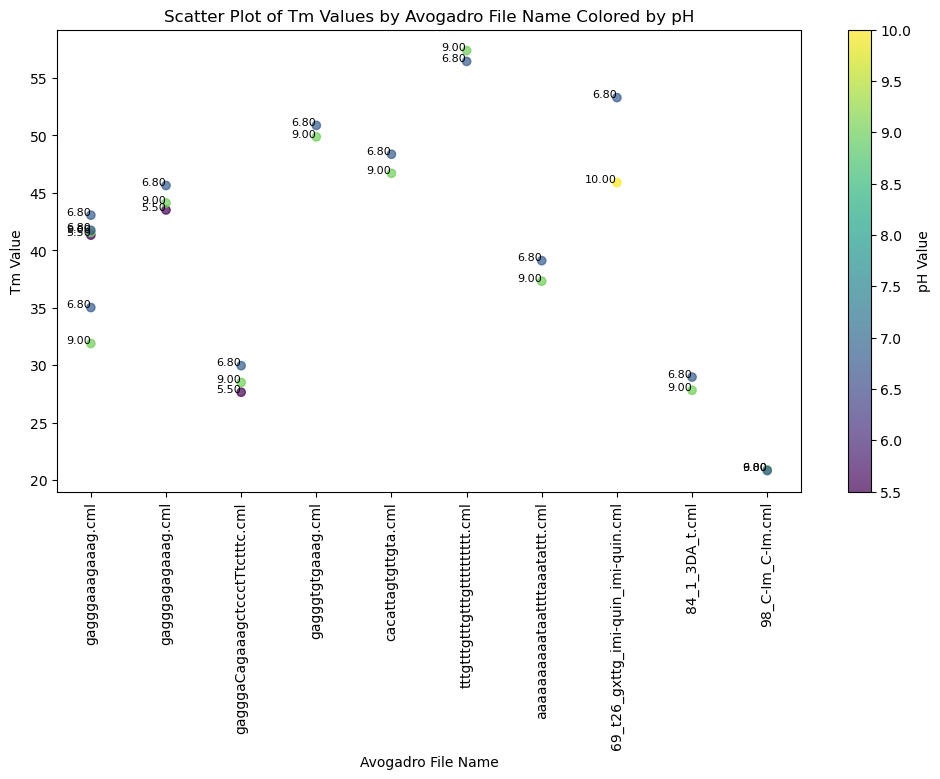

In [145]:
filtered_df = df_eda_updated[df_eda_updated['filter'].astype(str).str.contains("pH", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
print(tm_stats)
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

# Convert the 'pH' column to numeric, coercing errors to NaN
filtered_df['pH'] = pd.to_numeric(filtered_df['pH'], errors='coerce')

# Plotting again
plt.figure(figsize=(12, 6))
scatter = plt.scatter(filtered_df['Avogadro_file_name'], filtered_df['Tm'], c=filtered_df['pH'], cmap='viridis', alpha=0.7)

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('pH Value')

# Adding pH labels next to each point
for i, row in filtered_df.iterrows():
    plt.text(row['Avogadro_file_name'], row['Tm'], f"{row['pH']:.2f}", fontsize=8, ha='right')


# Labels and title
plt.xlabel('Avogadro File Name')
plt.ylabel('Tm Value')
plt.title('Scatter Plot of Tm Values by Avogadro File Name Colored by pH')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.savefig('pH_reduction_HB.png')
plt.show()


In [146]:
# Convert the 'pH' column to numeric if not already
df_eda_updated['pH'] = pd.to_numeric(df_eda_updated['pH'], errors='coerce')

# Identify the 10 Avogadro_file_name that are measured at different pH conditions
# Assuming you have the list of 10 file names, you can filter them as follows:
# Example list of Avogadro_file_name entries
avogadro_files_of_interest = tm_stats['Avogadro_file_name'].to_list()

# Filter the dataset for those file names
filtered_df = df_eda_updated[df_eda_updated['Avogadro_file_name'].isin(avogadro_files_of_interest)]

# Further filter to keep only those rows where the pH is 6.8
filtered_df_6_8 = filtered_df[filtered_df['pH'] == 6.8]

# Display the resulting DataFrame
filtered_df_6_8

# Remove rows from df_eda_updated that contain items from avogadro_files_of_interest
df_eda_updated = df_eda_updated[~df_eda_updated['Avogadro_file_name'].isin(avogadro_files_of_interest)]

# Assuming filtered_df_6_8 has already been created as shown previously
# Concatenate df_eda_updated with filtered_df_6_8
df_eda_updated_pH = pd.concat([df_eda_updated, filtered_df_6_8])

# Reset the index of the concatenated DataFrame
df_eda_updated_pH = df_eda_updated_pH.reset_index(drop=True)

# Display the resulting DataFrame
df_eda_updated_pH.head()

# Save the updated DataFrame for future use
df_eda_updated_pH.to_csv('df_eda_updated_pH.csv', index=False)
print(df_eda_updated_pH.shape)

(80, 46)


In [147]:
filtered_df = df_eda_updated_pH[df_eda_updated_pH['filter'].astype(str).str.contains("pH", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats 



,Avogadro_file_name,count,mean,max,min,std
0,69_t26_gxttg_imi-quin_imi-quin.cml,1,53.290000,53.29,53.29,NaN
1,84_1_3DA_t.cml,1,28.970000,28.97,28.97,NaN
2,98_C-Im_C-Im.cml,1,20.830000,20.83,20.83,NaN
3,aaaaaaaaaataattttaaatattt.cml,1,39.100000,39.10,39.10,NaN
4,cacattagtgttgta.cml,1,48.360000,48.36,48.36,NaN
5,gagggaCagaaagctccctTtctttc.cml,1,29.960000,29.96,29.96,NaN
6,gagggaaagaaag.cml,3,39.943333,43.06,35.02,4.313749
7,gagggagagaaag.cml,1,45.640000,45.64,45.64,NaN
8,gagggtgtgaaag.cml,1,50.870000,50.87,50.87,NaN
9,tttgtttgtttgtttgtttttttttt.cml,1,56.440000,56.44,56.44,NaN


/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_67944/2377272209.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pH'] = pd.to_numeric(filtered_df['pH'], errors='coerce')


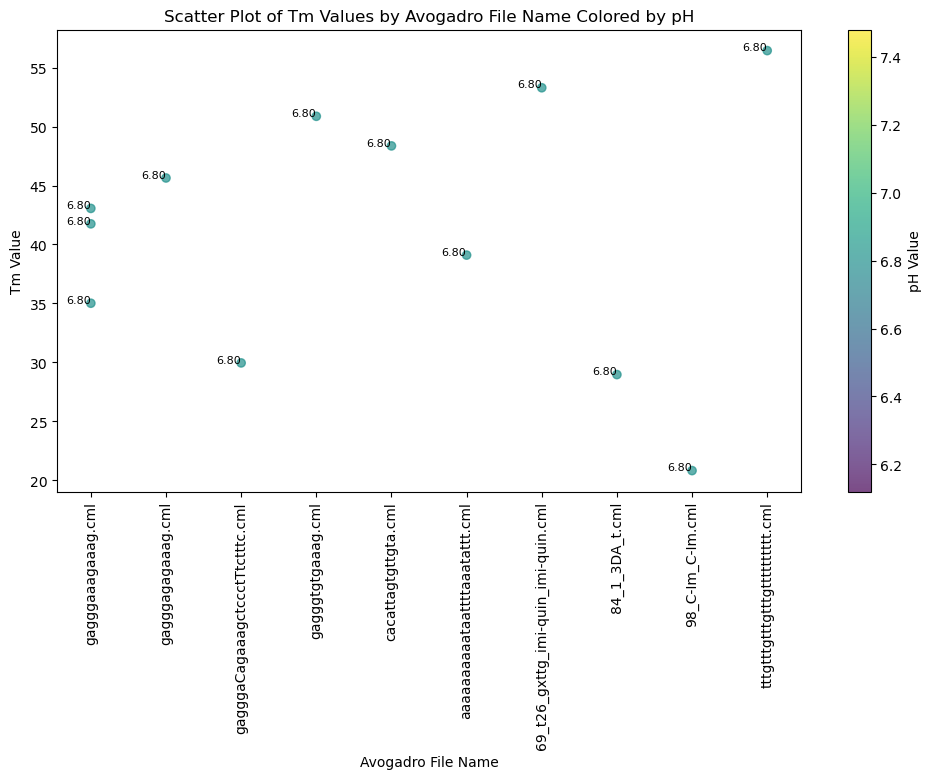

In [149]:
filtered_df = df_eda_updated_pH[df_eda_updated_pH['filter'].astype(str).str.contains("pH", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats 

# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

# Convert the 'pH' column to numeric, coercing errors to NaN
filtered_df['pH'] = pd.to_numeric(filtered_df['pH'], errors='coerce')

# Plotting again
plt.figure(figsize=(12, 6))
scatter = plt.scatter(filtered_df['Avogadro_file_name'], filtered_df['Tm'], c=filtered_df['pH'], cmap='viridis', alpha=0.7)

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('pH Value')

# Adding pH labels next to each point
for i, row in filtered_df.iterrows():
    plt.text(row['Avogadro_file_name'], row['Tm'], f"{row['pH']:.2f}", fontsize=8, ha='right')


# Labels and title
plt.xlabel('Avogadro File Name')
plt.ylabel('Tm Value')
plt.title('Scatter Plot of Tm Values by Avogadro File Name Colored by pH')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.savefig("15_pH_entries_removed.png")
plt.show()



The big Tm difference is due to Mg2+ ions which lower the Tm to near 35

### Salt impact is visible on gagggaaagaaag at pH 6.8

In [150]:
filtered_df = df_eda_updated_pH[df_eda_updated_pH['filter'].astype(str).str.contains("salt", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,98_C-Im_C-Im.cml,1,20.830000,20.83,20.83,NaN
1,gagggaaagaaag.cml,3,39.943333,43.06,35.02,4.313749
2,tttgtttgtttgtttgtttttttttt.cml,1,56.440000,56.44,56.44,NaN


In [151]:
# Dropping rows containing "Mg Ion" in the 'filter' column from df_eda_updated_pH
df_eda_updated_pH_no_salt = df_eda_updated_pH[~df_eda_updated_pH['filter'].astype(str).str.contains("Mg Ion", case=False, na=False)]

# Resetting the index
df_eda_updated_pH_no_salt = df_eda_updated_pH_no_salt.reset_index(drop=True)

# Display the updated DataFrame
df_eda_updated_pH_no_salt.head()

# Save the updated DataFrame if needed
df_eda_updated_pH_no_salt.to_csv('df_eda_updated_pH_no_Mg_Ion.csv', index=False)
df_eda_updated_pH_no_salt

,Unnamed: 0,Unnamed: 1,ID,DNA Sequence,Column1,Column2,DNA Duplex,type,Nucleotide shorthand,Metal Ion,...,DNA_conv3,DNA_conv4,Progres (y/n),Template,Notes,Avogadro_file_name,br,similar,checks,filter
0,NaN,NaN,3,NaN,#VALUE!,NaN,5'-d(GAG GGA CAG AAA G)-3'/3'-d(CTC CCT CTC TT...,mismatch,mismatch,none,...,ctttctctccctc,gaaagacagggag,test,x3DNA,NaN,gagggaCagaaagctccctCtctttc.cml,NaN,NaN,NaN,NaN
1,NaN,NaN,4,5'-d(TAC AGG TCC ATG GGA TCT GA)-3',tacaggtccatgggatctga,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,tacaggtccatgggatctga.cml,NaN,NaN,NaN,NaN
2,NaN,NaN,5,5'-d(CTT TCT GTC CCT C)-3',ctttctgtccctc,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,gagggacagaaag.cml,NaN,NaN,NaN,NaN
3,NaN,NaN,7,5'-d(TTT GTT TGT TTG ATT GTT TTT TTT TT)-3',tttgtttgtttgattgtttttttttt,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,tttgtttgtttgattgtttttttttt.cml,NaN,NaN,NaN,NaN
4,NaN,NaN,17,5‘-d(GAGGGTATGAAAG)-3',gagggtatgaaag,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,gagggtatgaaag.cml,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,26,5′-d(AAAAAAAAAATAATTTTAAATATTT)-3′,aaaaaaaaaataattttaaatattt,NaN,NaN,natural,natural,none,...,NaN,NaN,NaN,NaN,NaN,aaaaaaaaaataattttaaatattt.cml,NaN,NaN,NaN,pH diff
74,NaN,NaN,69,NaN,#VALUE!,NaN,5'-d(TTT GTT TGT TTG XTT GTT TTT TTT TT)-3'/3'...,chemically_modified,X=imi-quin,none,...,aaaaaaaaaacaaxcaaacaaacaaa,ttttttttttgttxgtttgtttgttt,ph 6.8,t26_gxttg,NaN,69_t26_gxttg_imi-quin_imi-quin.cml,NaN,69=70,NaN,pH diff
75,NaN,NaN,82,NaN,#VALUE!,NaN,5'-d(GAGGGAXAGAAAG)/ 3'-d(CTCCCTTTCTTTC),chemically_modified,X = 1_3DA,none,...,ctttctttccctc,gaaagaxagggag,y,UT,83=84,84_1_3DA_t.cml,t,83=84,NaN,pH diff
76,NaN,NaN,97,NaN,#VALUE!,NaN,5‘-d(GAGGGTXTGAAAG)/ 3‘-d(CTCCCAXACTTTC),chemically_modified,X = C-Im,none,...,ctttcaxaccctc,gaaagtxtgggag,y,UU,98,98_C-Im_C-Im.cml,NaN,97=98,NaN,salt and pH diff


In [160]:
pd.DataFrame(df_eda_updated_pH_no_salt['Consensuc sequence'].value_counts())

,count
Consensuc sequence,
gagggSSSgaaag,45
tttgtttgtStgSSSgtStttttttt,18
gtttgtttgSSSSSSStgttttttS,6
cacattaStgttgta,5
?,2
aaaaaaaaaStaattttxaatattt,2


In [152]:
filtered_df = df_eda_updated_pH_no_salt[df_eda_updated_pH_no_salt['filter'].astype(str).str.contains("salt", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,98_C-Im_C-Im.cml,1,20.83,20.83,20.83,NaN
1,gagggaaagaaag.cml,1,43.06,43.06,43.06,NaN
2,tttgtttgtttgtttgtttttttttt.cml,1,56.44,56.44,56.44,NaN


# Move to next notebookfor ML,LZ and MH experiments

In [153]:
filtered_df = df_eda[df_eda['type'].astype(str).str.contains("mismatch", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,52_6g_23_gtttgtttgXXXXXXtgtttttt_C_C.cml,1,29.300000,29.30,29.30,NaN
1,gagggaAagaaagctcccAAActttc.cml,1,15.200000,15.20,15.20,NaN
2,gagggaCagaaagctccctCtctttc.cml,1,25.850000,25.85,25.85,NaN
3,gagggaCagaaagctccctTtctttc.cml,3,28.703333,29.96,27.65,1.168346


In [154]:
filtered_df = df_eda[df_eda['type'].astype(str).str.contains("natural", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,aaaaaaaaaataattttaaatattt.cml,2,38.205000,39.10,37.31,1.265721
1,cacattaatgttgta.cml,1,42.650000,42.65,42.65,NaN
2,cacattagtgttgta.cml,2,47.530000,48.36,46.70,1.173797
3,gagggaaagaaag.cml,6,39.101667,43.06,31.89,4.524685
4,gagggacagaaag.cml,1,49.230000,49.23,49.23,NaN
5,gagggagagaaag.cml,3,44.423333,45.64,43.51,1.096920
6,gagggtatgaaag.cml,1,44.880000,44.88,44.88,NaN
7,gagggtgtgaaag.cml,2,50.370000,50.87,49.87,0.707107
8,tacaggtccatgggatctga.cml,1,64.140000,64.14,64.14,NaN
9,tttgtttgtttgattgtttttttttt.cml,1,53.370000,53.37,53.37,NaN


In [39]:
filtered_df = df_eda[df_eda['type'].astype(str).str.contains("chemically", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,100_xxx_6PP.cml,1,25.470,25.47,25.47,NaN
1,101_xxx_1D-6PP.cml,1,22.970,22.97,22.97,NaN
2,102_xxx_7D-6PP.cml,1,24.140,24.14,24.14,NaN
3,103_xxx_1-7D-6PP.cml,1,23.020,23.02,23.02,NaN
4,30_cm.cml,1,37.850,37.85,37.85,NaN
5,31_cm.cml,1,42.430,42.43,42.43,NaN
6,32_cm.cml,1,40.680,40.68,40.68,NaN
7,33_cm.cml,1,42.160,42.16,42.16,NaN
8,34_fo.cml,1,35.010,35.01,35.01,NaN
9,35_aA_c.cml,1,30.110,30.11,30.11,NaN


In [29]:
filtered_df = df_eda[df_eda['pH'].astype(str).str.contains("6.8", case=False, na=False)]
filtered_df
tm_stats = filtered_df.groupby('Avogadro_file_name')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
tm_stats
# tm_stats = filtered_df.groupby('pH')['Tm'].agg(['count','mean', 'max', 'min', 'std']).reset_index()
# tm_stats
# Display the filtered dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered DataFrame", dataframe=filtered_df)

,Avogadro_file_name,count,mean,max,min,std
0,100_xxx_6PP.cml,1,25.470000,25.47,25.47,NaN
1,101_xxx_1D-6PP.cml,1,22.970000,22.97,22.97,NaN
2,102_xxx_7D-6PP.cml,1,24.140000,24.14,24.14,NaN
3,103_xxx_1-7D-6PP.cml,1,23.020000,23.02,23.02,NaN
4,30_cm.cml,1,37.850000,37.85,37.85,NaN
5,31_cm.cml,1,42.430000,42.43,42.43,NaN
6,32_cm.cml,1,40.680000,40.68,40.68,NaN
7,33_cm.cml,1,42.160000,42.16,42.16,NaN
8,34_fo.cml,1,35.010000,35.01,35.01,NaN
9,35_aA_c.cml,1,30.110000,30.11,30.11,NaN


# Modeling

In [65]:
df = pd.read_csv('sorting_asus_all.csv')
df = df[['Tm','Avogadro_file_name']]
df = df.dropna()
# df[30:]
df

,Tm,Avogadro_file_name
0,35.02,gagggaaagaaag.cml
1,31.89,gagggaaagaaag.cml
2,25.85,gagggaCagaaagctccctCtctttc.cml
3,64.14,tacaggtccatgggatctga.cml
4,49.23,gagggacagaaag.cml
...,...,...
97,18.57,99_aa_c-im_c-im.cml
98,25.47,100_xxx_6PP.cml
99,22.97,101_xxx_1D-6PP.cml
100,24.14,102_xxx_7D-6PP.cml


In [66]:
df_type = pd.read_csv('sorting_asus_all.csv')
df_type = df_type[['Tm','Avogadro_file_name','type','Consensuc sequence','Nucleotide shorthand','pH']]
df_type = df_type.dropna()
# df[30:]
df_type.shape
df_type=df_type.reset_index(drop=True)
df_type

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH
0,35.02,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,6.8
1,31.89,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,9
2,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8
3,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8
4,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8
...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,chemically_modified,aaaaaaaaaStaattttxaatattt,X = C-Im,6.8
89,25.47,100_xxx_6PP.cml,chemically_modified,gagggSSSgaaag,X = 6PP,6.8
90,22.97,101_xxx_1D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 1D_6PP,6.8
91,24.14,102_xxx_7D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 7D_6PP,6.8


In [67]:

cwd = os.getcwd()
cwd

'/Users/ivanyankov/Documents/Chapter2/Notebooks/eval'

In [68]:
# test.count_occurrences(atoms = ['C', 'N', 'O', 'O1-', 'P'],cutoff_distance=12)

cwd = os.getcwd()
# Directory paths
chemically_modified_dir = f'{cwd}/All/cml_chemicallymodified/'
natural_dir = f'{cwd}/All/cml_w3DNA_natural/'
mismatch_dir = f'{cwd}/All/cml_w3DNA_mismatch/'


rows=[]
files=[]
# Initialize an empty DataFrame to store all results
df_desc = pd.DataFrame()


# Loop over each cutoff distance
for file in df['Avogadro_file_name']:
    # Call the count_occurrences method with the current cutoff distance

     # Check if the file exists in the chemically modified directory
    file_path = os.path.join(chemically_modified_dir, file)
    
    if not os.path.exists(file_path):
        # If not found, check the natural directory
        file_path = os.path.join(natural_dir, file)
        if not os.path.exists(file_path):
            # If not found, check the natural directory
            file_path = os.path.join(mismatch_dir, file)
            
            

        
    if os.path.exists(file_path):
        # Call the Molecule function with the file path
        test = Molecule(file_path, mapping=filtered_label_mapping)
        # Process 'test' as needed


    # test = Molecule(f'{file}', mapping=filtered_label_mapping)

        occurrence_counts = test.count_occurrences(cutoff_distance=12, crit=None)
        # occurrence_counts = test.count_occurrences(cutoff_distance=12)

        # Convert the dictionary to a list of counts
        counts = list(occurrence_counts.values())

        # Add the current cutoff distance as the last column

        # Store the row as a DataFrame in the list
        row_df = pd.DataFrame([counts])
        rows.append(row_df)
        files.append(file)
    else:
        print(f"File {file} not found in either directory.")

# Concatenate all rows into a single DataFrame
df_desc = pd.concat(rows, ignore_index=True)


# Define column names from the atom pairs and add "Cutoff Distance" as the last column
columns = [f'{pair[0]}-{pair[1]}' for pair in occurrence_counts.keys()]


# # Assign the column names to the DataFrame
df_desc.columns = columns
# df_desc = pd.concat([df_desc,pd.Series(files)],axis=1,ignore_index=True)
df_desc
# df=pd.concat([df,df_desc],axis=1)
# df


/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,C_sugar-H_sugar,O_backbone-C_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,680,45,981,454,359,50,688,746,821,48,...,1310,829,102,1270,564,484,79,879,1019,1135
1,680,45,981,454,359,50,688,746,821,48,...,1310,829,102,1270,564,484,79,879,1019,1135
2,677,44,975,432,359,50,712,750,820,44,...,1280,834,102,1256,534,483,79,914,1021,1132
3,1122,74,1881,470,603,86,1639,1390,1372,72,...,1916,1374,169,2466,588,795,135,2149,1865,1874
4,677,44,1014,433,359,50,759,768,820,44,...,1280,834,102,1312,539,483,79,973,1043,1132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1059,70,2076,662,559,93,1460,1530,1284,68,...,2202,1286,153,2712,849,735,142,1921,2088,1738
89,221,5,736,310,107,23,451,602,257,5,...,1069,268,13,941,407,150,39,592,819,369
90,221,5,758,310,107,23,441,634,257,5,...,1072,267,13,972,407,150,39,580,860,368
91,221,5,753,310,107,23,446,626,257,5,...,1070,267,13,969,407,150,39,583,856,368


In [69]:
df_reset=df.reset_index(drop=True)

df_temp=pd.concat([df_reset,df_desc],axis=1)#
df_temp

,Tm,Avogadro_file_name,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,35.02,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
1,31.89,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
2,25.85,gagggaCagaaagctccctCtctttc.cml,677,44,975,432,359,50,712,750,...,1280,834,102,1256,534,483,79,914,1021,1132
3,64.14,tacaggtccatgggatctga.cml,1122,74,1881,470,603,86,1639,1390,...,1916,1374,169,2466,588,795,135,2149,1865,1874
4,49.23,gagggacagaaag.cml,677,44,1014,433,359,50,759,768,...,1280,834,102,1312,539,483,79,973,1043,1132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,1059,70,2076,662,559,93,1460,1530,...,2202,1286,153,2712,849,735,142,1921,2088,1738
89,25.47,100_xxx_6PP.cml,221,5,736,310,107,23,451,602,...,1069,268,13,941,407,150,39,592,819,369
90,22.97,101_xxx_1D-6PP.cml,221,5,758,310,107,23,441,634,...,1072,267,13,972,407,150,39,580,860,368
91,24.14,102_xxx_7D-6PP.cml,221,5,753,310,107,23,446,626,...,1070,267,13,969,407,150,39,583,856,368


In [70]:
df_temp.to_csv('check_for_0_fixed_2.csv')

In [18]:
df = pd.read_csv('test.csv')
# df
df = df[['Tm','Progres (y/n)','Avogadro_file_name','Structure']]
df = df.dropna()
df

,Tm,Progres (y/n),Avogadro_file_name,Structure
28,37.85,y,30.cml,30.0
29,42.43,y,31.cml,31.0
30,40.68,y,32.cml,32.0
31,42.16,y,33.cml,33.0
32,35.01,y,34.cml,34.0
33,30.11,y,35_eA_c.cml,35.0
34,31.98,y,36_eA_t.cml,36.0
35,31.13,y,37_t_eA.cml,37.0
37,26.05,y,39_Im_c.cml,39.0
38,48.98,mt,40_t26_gxttg_X_X.cml,40.0


In [21]:
directory_path

'/Users/ivanyankov/Documents/Chapter2/Notebooks/eval'

In [ ]:
directory_path = os.getcwd()

cml_files = [f for f in os.listdir(directory_path) if f.endswith('.cml')]

# Extract the integer values from the cml filenames
cml_integers = {int(f.split('_')[0]): f for f in cml_files}

# Match these integers with the Structure column in the DataFrame
df['CML_Filename'] = df['Structure'].map(cml_integers)

# Display the updated DataFrame
df=df.dropna()
df=df.reset_index(drop=True)

In [20]:
import os

In [142]:
# test.count_occurrences(atoms = ['C', 'N', 'O', 'O1-', 'P'],cutoff_distance=12)

rows=[]
files=[]
# Initialize an empty DataFrame to store all results
df_desc = pd.DataFrame()


# Loop over each cutoff distance
for file in df['CML_Filename']:
    # Call the count_occurrences method with the current cutoff distance
    test = Molecule(f'{file}', mapping=filtered_label_mapping)

    occurrence_counts = test.count_occurrences(cutoff_distance=12, crit='DNA')
    # occurrence_counts = test.count_occurrences(cutoff_distance=12)

    # Convert the dictionary to a list of counts
    counts = list(occurrence_counts.values())

    # Add the current cutoff distance as the last column

    # Store the row as a DataFrame in the list
    row_df = pd.DataFrame([counts])
    rows.append(row_df)
    files.append(file)

# Concatenate all rows into a single DataFrame
df_desc = pd.concat(rows, ignore_index=True)


# Define column names from the atom pairs and add "Cutoff Distance" as the last column
columns = [f'{pair[0]}-{pair[1]}' for pair in occurrence_counts.keys()]


# # Assign the column names to the DataFrame
df_desc.columns = columns
# df_desc = pd.concat([df_desc,pd.Series(files)],axis=1,ignore_index=True)
df_desc
df=pd.concat([df,df_desc],axis=1)
df


/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


,Tm,Progres (y/n),Avogadro_file_name,Structure,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,37.85,y,30.cml,30.0,30_cm.cml,2436,675,4553,1273,1354,...,5177,3253,961,6168,1717,1890,617,4356,5177,4530
1,42.43,y,31.cml,31.0,31_cm.cml,2436,675,4549,1254,1354,...,5176,3253,961,6168,1692,1890,617,4352,5176,4530
2,40.68,y,32.cml,32.0,32_cm.cml,2436,675,4557,1254,1354,...,5173,3253,961,6165,1694,1890,617,4358,5173,4530
3,42.16,y,33.cml,33.0,33_cm.cml,2436,675,4545,1235,1354,...,5170,3253,961,6165,1667,1890,617,4348,5170,4530
4,35.01,y,34.cml,34.0,34_fo.cml,2436,675,4470,1235,1354,...,5136,3253,961,6045,1667,1890,617,4389,5136,4530
5,30.11,y,35_eA_c.cml,35.0,35_aA_c.cml,3163,862,4941,1218,1766,...,5519,4216,1242,6714,1633,2451,725,5108,5519,5833
6,31.98,y,36_eA_t.cml,36.0,36_eA_t.cml,3163,862,4973,1255,1766,...,5559,4218,1242,6762,1683,2451,725,5052,5559,5835
7,31.13,y,37_t_eA.cml,37.0,37_t_eA.cml,3169,863,4944,1260,1766,...,5507,4222,1241,6710,1677,2452,725,5086,5507,5835
8,26.05,y,39_Im_c.cml,39.0,39_Im_c.cml,3163,862,4808,1218,1766,...,5481,4216,1242,6517,1633,2451,725,4961,5481,5833
9,48.98,mt,40_t26_gxttg_X_X.cml,40.0,40_t26_gxttg_Im_Im_1.cml,2309,840,2783,1114,1330,...,3633,3191,1157,3913,1520,1846,618,1904,3633,4414


In [31]:
import matplotlib.pyplot as plt

# Assuming 'Tm' is the column name in your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# for col in numeric_columns:
#     if col != 'Tm':  # Exclude 'Tm' itself from being plotted against 'Tm'
#         plt.figure()
#         plt.scatter(df['Tm'], df[col])
#         plt.title(f'Tm vs {col}')
#         plt.xlabel('Tm')
#         plt.ylabel(col)
#         plt.show()

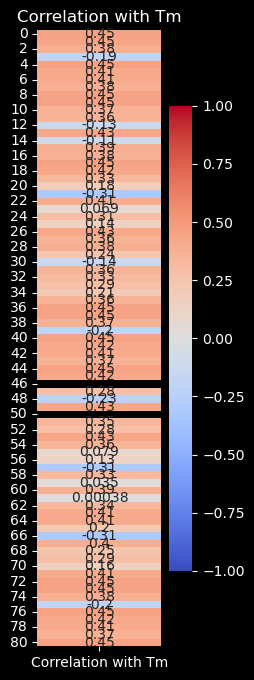

In [36]:
# correlation_matrix = df_desc.corr()
# tm_correlation = correlation_matrix[['Tm']]
plt.figure(figsize=(2, 8))
sns.heatmap(correlation_df[['Correlation with Tm']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Tm')
plt.savefig('corr_heatmap_of_DNA_score_desc_2.png')
plt.show()

In [35]:
correlation_results = {}

for col in df_desc.select_dtypes(include=['number']).columns:
    if 'Tm' in df.columns:
        correlation = df['Tm'].corr(df_desc[col])
        correlation_results[col] = correlation

# Convert the results to a DataFrame for easier visualization
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Property', 'Correlation with Tm'])
# correlation_df

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [33]:
import seaborn as sns


In [44]:
# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Draw the heatmap
# sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)

# # Display the heatmap
# plt.show()

In [37]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
def plot_predictions(model,x_test,y_test,correction=0,model_name="MLR",figure_name="actual_vs_predicted"):
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred-correction)
    mae = mean_absolute_error(y_test, y_pred-correction)
    r2 = r2_score(y_test, y_pred-correction)
    bias = np.mean(y_pred - y_test)

    # Calculate the slope/gradient
    # reg = LinearRegression().fit(y_test, (y_pred - correction))
    # slope = reg.coef_[0][0]

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred-correction, color='blue', label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Text box with metrics
    textstr = '\n'.join((
        f'R²: {r2:.2f}',
        f'Bias: {bias:.2f}',
        f'MAE: {mae:.2f}'
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    # plt.savefig(f'{figure_name}_{model_name}.png')
    plt.show()

In [39]:
df.columns[2:]

Index([], dtype='object')

In [40]:
df=df.dropna()
df
contains_zero = (df == 0).any().any()
if contains_zero:
    print("There are rows containing zero.")
else:
    print("There are no rows containing zero.")

    # Assuming df is your DataFrame
rows_with_zero = df[(df == 0).any(axis=1)]

rows_with_zero
df.to_csv('remove_zore_attemp_2.csv')
# df_lz
df

There are no rows containing zero.


,Tm,Avogadro_file_name
0,35.02,gagggaaagaaag.cml
1,31.89,gagggaaagaaag.cml
2,25.85,gagggaCagaaagctccctCtctttc.cml
3,64.14,tacaggtccatgggatctga.cml
4,49.23,gagggacagaaag.cml
...,...,...
97,18.57,99_aa_c-im_c-im.cml
98,25.47,100_xxx_6PP.cml
99,22.97,101_xxx_1D-6PP.cml
100,24.14,102_xxx_7D-6PP.cml


In [71]:
# df=pd.read_csv('check_for_0.csv')
df=pd.read_csv('check_for_0_fixed_2.csv')
df=df.drop(columns='Unnamed: 0')
df

,Tm,Avogadro_file_name,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,35.02,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
1,31.89,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
2,25.85,gagggaCagaaagctccctCtctttc.cml,677,44,975,432,359,50,712,750,...,1280,834,102,1256,534,483,79,914,1021,1132
3,64.14,tacaggtccatgggatctga.cml,1122,74,1881,470,603,86,1639,1390,...,1916,1374,169,2466,588,795,135,2149,1865,1874
4,49.23,gagggacagaaag.cml,677,44,1014,433,359,50,759,768,...,1280,834,102,1312,539,483,79,973,1043,1132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,1059,70,2076,662,559,93,1460,1530,...,2202,1286,153,2712,849,735,142,1921,2088,1738
89,25.47,100_xxx_6PP.cml,221,5,736,310,107,23,451,602,...,1069,268,13,941,407,150,39,592,819,369
90,22.97,101_xxx_1D-6PP.cml,221,5,758,310,107,23,441,634,...,1072,267,13,972,407,150,39,580,860,368
91,24.14,102_xxx_7D-6PP.cml,221,5,753,310,107,23,446,626,...,1070,267,13,969,407,150,39,583,856,368


In [72]:
X2=df[df.columns[2:]]
y2=df['Tm']

In [73]:
X_train=df[df.columns[2:]]
y_train=df['Tm']

In [74]:
# Create the Linear Regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# plot_predictions(model,X_train,y_train,correction=0,model_name="MLR",figure_name="actual_vs_predicted")

In [75]:
# val_index_list

In [76]:
df_type

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH
0,35.02,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,6.8
1,31.89,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,9
2,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8
3,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8
4,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8
...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,chemically_modified,aaaaaaaaaStaattttxaatattt,X = C-Im,6.8
89,25.47,100_xxx_6PP.cml,chemically_modified,gagggSSSgaaag,X = 6PP,6.8
90,22.97,101_xxx_1D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 1D_6PP,6.8
91,24.14,102_xxx_7D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 7D_6PP,6.8


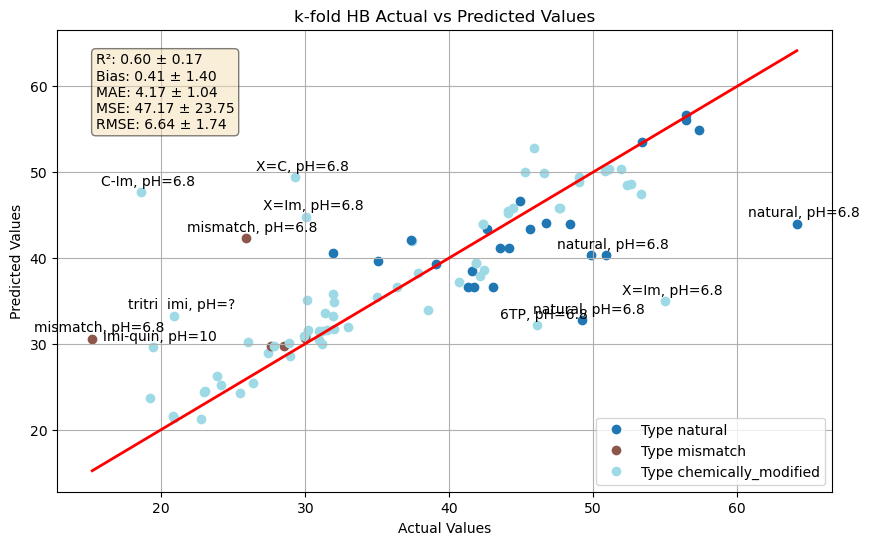

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


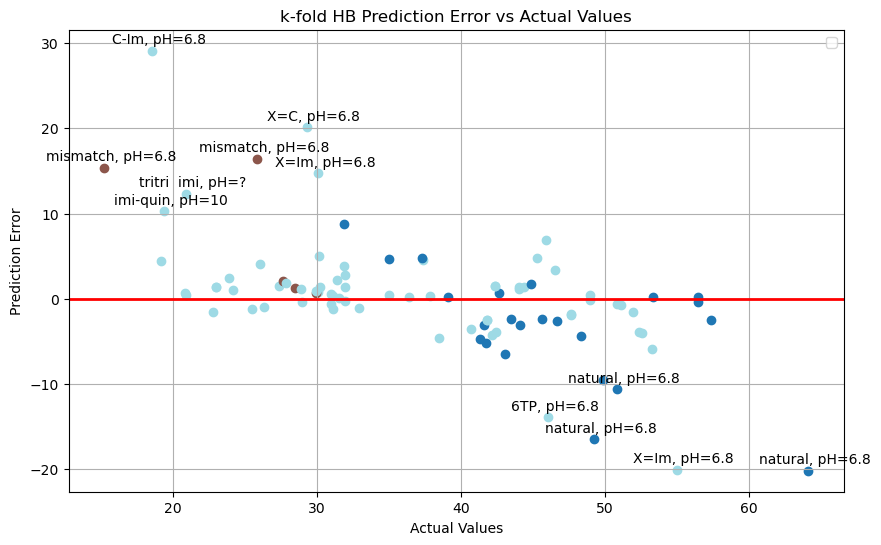

In [84]:
#  after 25th of August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_error_in_actual_value.png')
plt.show()

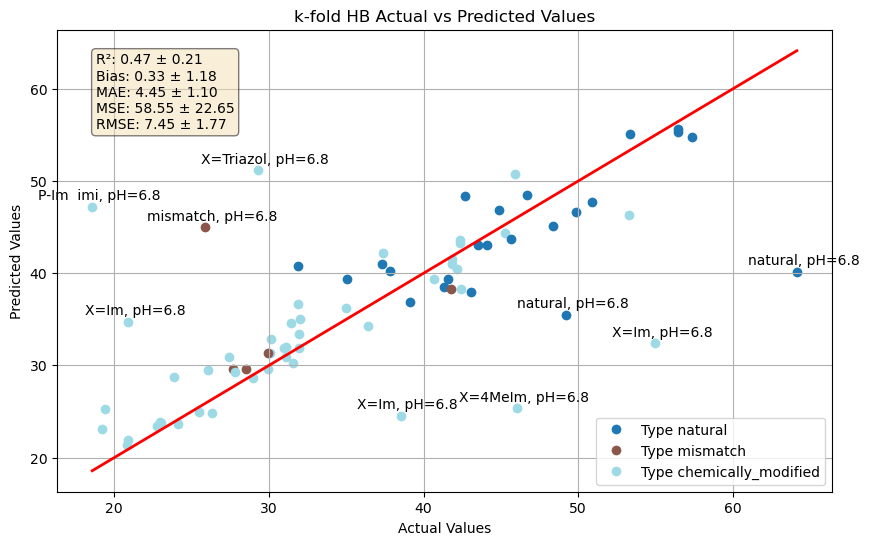

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


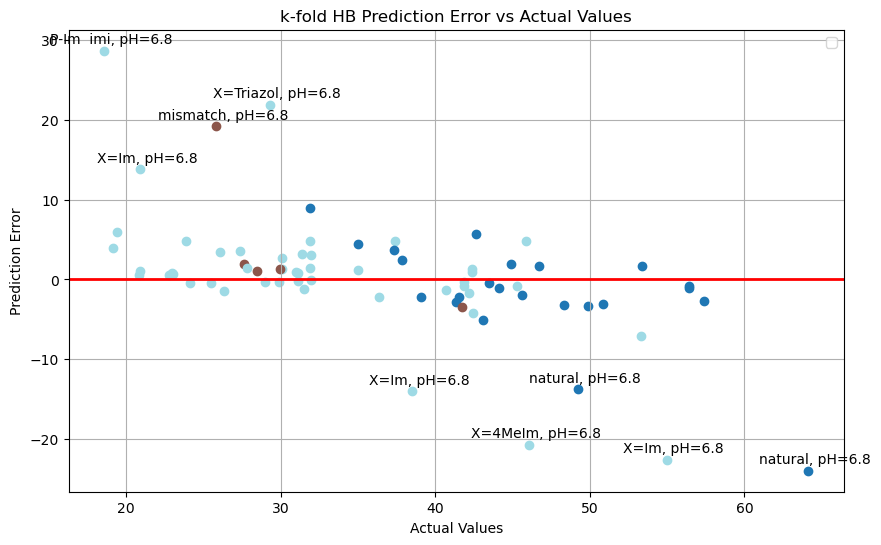

In [231]:
# before 25 August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_error_in_actual_value.png')
plt.show()

Bias: -0.11 vs -0.09 
MAE: 4.82 vs 4.81
R²: 0.37 vs 0.37


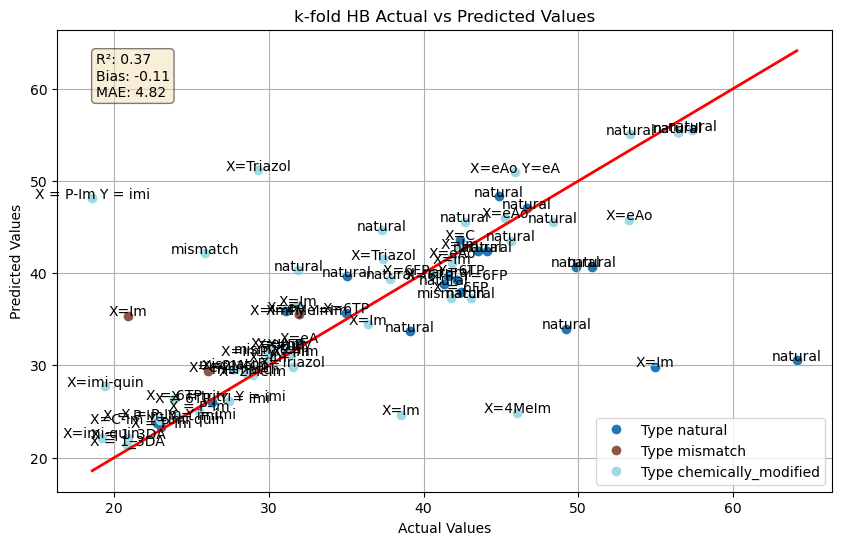

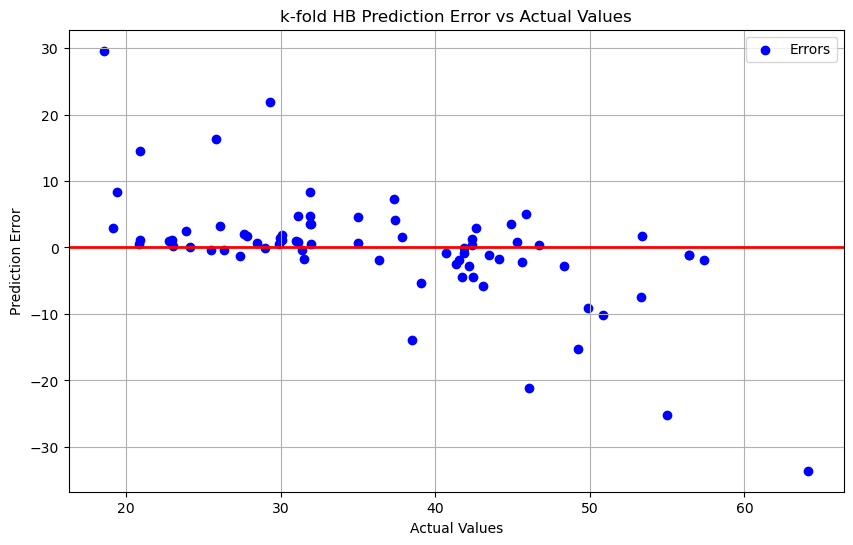

In [226]:
# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]

val_index_list=[]

for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    val_index_list.extend(val_index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
name_col='type' #'Consensuc sequence'
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))  # Choose a colormap, tab20 can handle up to 20 colors
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

# Plot actual vs predicted values with color-coding
plt.figure(figsize=(10, 6))

# Plot with color corresponding to the values in the 'column_name' column
for i, (actual, pred, color) in enumerate(zip(actuals, predictions, colors)):
    plt.scatter(actual, pred, color=color, label=f'Type {df_type[name_col].iloc[val_index_list[i]]}' if i == 0 else "")
    plt.annotate(f'{df_type["Nucleotide shorthand"].iloc[val_index_list[i]]}',  # Label with the type
                 (actual, pred),  # Position to place the label
                 textcoords="offset points",  # Use offset for positioning
                 xytext=(0,0),  # Slight offset to the right and up
                 ha='center')  # Horizontal alignment
# Create a custom legend to show all types
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')
# plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')


plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

In [80]:
for f in os.listdir(f'{directory_path}/Archie/'):
    print(f)

gacctagacaccattc.pdb
gcgcggac.pdb
gcggtgac.pdb
gcatggac.pdb
gatgccaggtcgataa.pdb
ctaccactaagccttg.pdb
acattattattaca.pdb
acgtattatgc.pdb
caaatcaaag.pdb
aatccagt.pdb
gcaaggac.pdb
ctcacgcc.pdb
gcatgc.pdb
cggacg.pdb
gcgacgac.pdb
tgctggac.pdb
gcgtcgac.pdb
cgctgttac.pdb
gcaccgac.pdb
gctgaatgtcctag.pdb
cacgactatctgaacc.pdb
ctatggac.pdb
ggctggac.pdb
gacttgtggacggtat.pdb
tagatcta.pdb
cggccg.pdb
acatatgt.pdb
ctaaggtcgtgtatcc.pdb
gctcagac.pdb
accgca.pdb
tcatggac.pdb
gaatattc.pdb
gccgggac.pdb
gccctgac.pdb
caatggac.pdb
aggtggac.pdb
taggccta.pdb
cgttggac.pdb
ggaacttgatgc.pdb
tgttgc.pdb
gctccgac.pdb
tactggac.pdb
gccagttaa.pdb
ccctggac.pdb
gagaccagagtgatc.pdb
gtacgtac.pdb
gacagtagctcggaat.pdb
gctaggac.pdb
tctatgca.pdb
caaagtaaag.pdb
caagcttg.pdb
ataactggc.pdb
caaaacaaag.pdb
tcgattaggacacagg.pdb
ttctggac.pdb
caaagaaaag.pdb
gcttggac.pdb
aagtggac.pdb
cgatggac.pdb
gtctggac.pdb
agttgc.pdb
cgcg.pdb
aaaaaaaa.pdb
cgctcaatgcctggag.pdb
cattggac.pdb
cttgtacttg.pdb
cacggctc.pdb
gtcgaaca.pdb
tcttggac.pdb
cgatgttc

In [81]:
f

'caaacaaaag.pdb'

In [82]:
from openbabel import openbabel

In [86]:
f='caaacaaaag.pdb'
file_path =f'{directory_path}/Archie/{f}'
output_file=f'test_{f}'
obConversion = openbabel.OBConversion()

out="pdb"

# Set the input format to CML and output format to PDB
obConversion.SetInAndOutFormats("pdb", f"{out}")

# Create an OBMol object to hold the molecule data
mol = openbabel.OBMol()

# Read the CML file
obConversion.ReadFile(mol, f"{file_path}")

if output_file is not None:
    # obConversion.WriteFile(mol, "output.pdb")
    obConversion.WriteFile(mol, f"{output_file}")

# Write the molecule data to a PDB file
content = obConversion.WriteString(mol)
content

"COMPND    /Users/ivanyankov/Documents/Chapter2/Notebooks/eval/Archie/caaacaaaag.pdb \nAUTHOR    GENERATED BY OPEN BABEL 3.1.0\nATOM      1 HO5' DC      1      -0.423  -8.150  -2.094  1.00  0.00           H  \nATOM      2  O5' DC      1       0.427  -7.826  -1.788  1.00  0.00           O  \nATOM      3  C5' DC      1       1.443  -7.510  -2.756  1.00  0.00           C  \nATOM      4  H5' DC      1       1.100  -6.745  -3.453  1.00  0.00           H  \nATOM      5 H5'' DC      1       1.674  -8.423  -3.305  1.00  0.00           H  \nATOM      6  C4' DC      1       2.695  -7.020  -2.053  1.00  0.00           C  \nATOM      7  H4' DC      1       3.574  -7.056  -2.696  1.00  0.00           H  \nATOM      8  O4' DC      1       2.477  -5.630  -1.823  1.00  0.00           O  \nATOM      9  C1' DC      1       2.308  -5.333  -0.452  1.00  0.00           C  \nATOM     10  H1' DC      1       3.112  -4.685  -0.102  1.00  0.00           H  \nATOM     11  N1  DC      1       1.098  -4.468  -0.3

In [143]:
df.to_csv('MH_for_merge.csv')

In [144]:
df

,Tm,Progres (y/n),Avogadro_file_name,Structure,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,37.85,y,30.cml,30.0,30_cm.cml,2436,675,4553,1273,1354,...,5177,3253,961,6168,1717,1890,617,4356,5177,4530
1,42.43,y,31.cml,31.0,31_cm.cml,2436,675,4549,1254,1354,...,5176,3253,961,6168,1692,1890,617,4352,5176,4530
2,40.68,y,32.cml,32.0,32_cm.cml,2436,675,4557,1254,1354,...,5173,3253,961,6165,1694,1890,617,4358,5173,4530
3,42.16,y,33.cml,33.0,33_cm.cml,2436,675,4545,1235,1354,...,5170,3253,961,6165,1667,1890,617,4348,5170,4530
4,35.01,y,34.cml,34.0,34_fo.cml,2436,675,4470,1235,1354,...,5136,3253,961,6045,1667,1890,617,4389,5136,4530
5,30.11,y,35_eA_c.cml,35.0,35_aA_c.cml,3163,862,4941,1218,1766,...,5519,4216,1242,6714,1633,2451,725,5108,5519,5833
6,31.98,y,36_eA_t.cml,36.0,36_eA_t.cml,3163,862,4973,1255,1766,...,5559,4218,1242,6762,1683,2451,725,5052,5559,5835
7,31.13,y,37_t_eA.cml,37.0,37_t_eA.cml,3169,863,4944,1260,1766,...,5507,4222,1241,6710,1677,2452,725,5086,5507,5835
8,26.05,y,39_Im_c.cml,39.0,39_Im_c.cml,3163,862,4808,1218,1766,...,5481,4216,1242,6517,1633,2451,725,4961,5481,5833
9,48.98,mt,40_t26_gxttg_X_X.cml,40.0,40_t26_gxttg_Im_Im_1.cml,2309,840,2783,1114,1330,...,3633,3191,1157,3913,1520,1846,618,1904,3633,4414


In [145]:
df.columns

Index(['Tm', 'Progres (y/n)', 'Avogadro_file_name', 'Structure',
       'CML_Filename', 'C_sugar-C_sugar', 'C_sugar-O_backbone',
       'C_sugar-C_nucleobase', 'C_sugar-O_nucleobase', 'C_sugar-O_sugar',
       'C_sugar-P_backbone', 'C_sugar-N_nucleobase', 'C_sugar-H_nucleobase',
       'C_sugar-H_sugar', 'O_backbone-C_sugar', 'O_backbone-O_backbone',
       'O_backbone-C_nucleobase', 'O_backbone-O_nucleobase',
       'O_backbone-O_sugar', 'O_backbone-P_backbone',
       'O_backbone-N_nucleobase', 'O_backbone-H_nucleobase',
       'O_backbone-H_sugar', 'C_nucleobase-C_sugar', 'C_nucleobase-O_backbone',
       'C_nucleobase-C_nucleobase', 'C_nucleobase-O_nucleobase',
       'C_nucleobase-O_sugar', 'C_nucleobase-P_backbone',
       'C_nucleobase-N_nucleobase', 'C_nucleobase-H_nucleobase',
       'C_nucleobase-H_sugar', 'O_nucleobase-C_sugar',
       'O_nucleobase-O_backbone', 'O_nucleobase-C_nucleobase',
       'O_nucleobase-O_nucleobase', 'O_nucleobase-O_sugar',
       'O_nucleobase-P_ba

In [79]:
df_lz = pd.read_csv('Lomzov_for_merging.csv')
df_lz

,Unnamed: 0,Tm,DNA,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,0,16.9,aaaaaaaa,aaaaaaaa.pdb,2424,628,3172,690,1458,354,...,3483,3432,912,4359,942,1992,518,3220,3483,4642
1,1,27.9,aaaaaaaaa,aaaaaaaaa.pdb,2810,732,3656,795,1690,414,...,4005,3966,1062,5018,1083,2302,606,3704,4005,5352
2,2,32.0,aaaaaaaaaa,aaaaaaaaaa.pdb,3196,836,4140,900,1922,474,...,4527,4500,1212,5677,1224,2612,694,4188,4527,6062
3,3,35.7,aactggac,aactggac.pdb,2424,628,3068,699,1458,354,...,3438,3432,912,4205,966,1992,518,3461,3438,4642
4,4,37.0,aagcgtag,aagcgtag.pdb,2424,628,3065,696,1458,354,...,3447,3432,912,4207,969,1992,518,3458,3447,4642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,300,28.7,ttcattcc,ttcattcc.pdb,2424,628,3093,688,1458,354,...,3444,3432,912,4245,946,1992,518,3389,3444,4642
301,301,32.9,ttctggac,ttctggac.pdb,2424,628,3044,676,1458,354,...,3374,3432,912,4171,928,1992,518,3495,3374,4642
302,302,69.2,ttgaagatacgctggc,ttgaagatacgctggc.pdb,5512,1460,6802,1522,3314,834,...,7524,7704,2112,9276,2087,4472,1222,7616,7524,10322
303,303,35.8,ttgtggac,ttgtggac.pdb,2424,628,3045,677,1458,354,...,3390,3432,912,4176,932,1992,518,3488,3390,4642


In [80]:
# Drop columns containing 'H' in their names for both DataFrames
df_lz = df_lz.loc[:, ~df_lz.columns.str.contains('H')]
df = df.loc[:, ~df.columns.str.contains('H')]
# Get the intersection of columns between the two DataFrames
common_columns = df_lz.columns.intersection(df.columns)

# Reorder the columns in both DataFrames to ensure the same order
df_lz = df_lz[common_columns]
df = df[common_columns]


In [81]:
# df
df_lz

,Tm,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,O_backbone-C_sugar,O_backbone-O_backbone,...,P_backbone-O_sugar,P_backbone-P_backbone,P_backbone-N_nucleobase,N_nucleobase-C_sugar,N_nucleobase-O_backbone,N_nucleobase-C_nucleobase,N_nucleobase-O_nucleobase,N_nucleobase-O_sugar,N_nucleobase-P_backbone,N_nucleobase-N_nucleobase
0,16.9,2424,628,3172,690,1458,354,2334,628,160,...,222,46,336,2334,546,2945,591,1339,336,2076
1,27.9,2810,732,3656,795,1690,414,2690,732,186,...,260,54,390,2690,632,3408,684,1543,390,2403
2,32.0,3196,836,4140,900,1922,474,3046,836,212,...,298,62,444,3046,718,3871,777,1747,444,2730
3,35.7,2424,628,3068,699,1458,354,2507,628,160,...,222,46,358,2507,594,2986,642,1425,358,2404
4,37.0,2424,628,3065,696,1458,354,2511,628,160,...,222,46,360,2511,598,2992,643,1434,360,2404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,2424,628,3093,688,1458,354,2460,628,160,...,222,46,350,2460,579,2974,623,1403,350,2285
301,32.9,2424,628,3044,676,1458,354,2535,628,160,...,222,46,358,2535,602,2983,641,1443,358,2410
302,69.2,5512,1460,6802,1522,3314,834,5575,1460,368,...,526,110,817,5575,1348,6730,1439,3175,817,5386
303,35.8,2424,628,3045,677,1458,354,2532,628,160,...,222,46,358,2532,601,2985,640,1442,358,2406


In [150]:
test= Molecule('41_t26_gxttg_Triazol_Triazol_1.cml',mapping=filtered_label_mapping)
test.unique_atom_labels


{('C_sugar', 'C_sugar'): 0,
 ('C_sugar', 'O_backbone'): 0,
 ('C_sugar', 'C_nucleobase'): 0,
 ('C_sugar', 'O_nucleobase'): 0,
 ('C_sugar', 'O_sugar'): 0,
 ('C_sugar', 'P_backbone'): 0,
 ('C_sugar', 'N_nucleobase'): 0,
 ('C_sugar', 'H_nucleobase'): 0,
 ('C_sugar', 'H_sugar'): 0,
 ('O_backbone', 'C_sugar'): 0,
 ('O_backbone', 'O_backbone'): 0,
 ('O_backbone', 'C_nucleobase'): 0,
 ('O_backbone', 'O_nucleobase'): 0,
 ('O_backbone', 'O_sugar'): 0,
 ('O_backbone', 'P_backbone'): 0,
 ('O_backbone', 'N_nucleobase'): 0,
 ('O_backbone', 'H_nucleobase'): 0,
 ('O_backbone', 'H_sugar'): 0,
 ('C_nucleobase', 'C_sugar'): 0,
 ('C_nucleobase', 'O_backbone'): 0,
 ('C_nucleobase', 'C_nucleobase'): 0,
 ('C_nucleobase', 'O_nucleobase'): 0,
 ('C_nucleobase', 'O_sugar'): 0,
 ('C_nucleobase', 'P_backbone'): 0,
 ('C_nucleobase', 'N_nucleobase'): 0,
 ('C_nucleobase', 'H_nucleobase'): 0,
 ('C_nucleobase', 'H_sugar'): 0,
 ('O_nucleobase', 'C_sugar'): 0,
 ('O_nucleobase', 'O_backbone'): 0,
 ('O_nucleobase', 'C_nucl

Weight: 1.0, Avg. MAE: 8.433962737944926, Avg. MAE1: 0.914604649687746
Weight: 56.44444444444444, Avg. MAE: 8.139299640197764, Avg. MAE1: 0.8892467017954735
Weight: 111.88888888888889, Avg. MAE: 8.263692398552628, Avg. MAE1: 0.9073542642466832
Weight: 167.33333333333331, Avg. MAE: 8.292193024030894, Avg. MAE1: 0.8942056928181119
Weight: 222.77777777777777, Avg. MAE: 8.556431016605451, Avg. MAE1: 0.8916388210382532
Weight: 278.22222222222223, Avg. MAE: 8.014473752678299, Avg. MAE1: 0.9098918918813442
Weight: 333.66666666666663, Avg. MAE: 8.219314082491584, Avg. MAE1: 0.9024206635441079
Weight: 389.1111111111111, Avg. MAE: 8.068341244588744, Avg. MAE1: 0.8952714178376284
Weight: 444.55555555555554, Avg. MAE: 8.2515795235089, Avg. MAE1: 0.9083804234972692
Weight: 500.0, Avg. MAE: 8.36442732767338, Avg. MAE1: 0.8922405103434843
Best weight: 500.0, Best Avg. MSE: 8.36442732767338,
Train: 22 Test: 66 out of 88


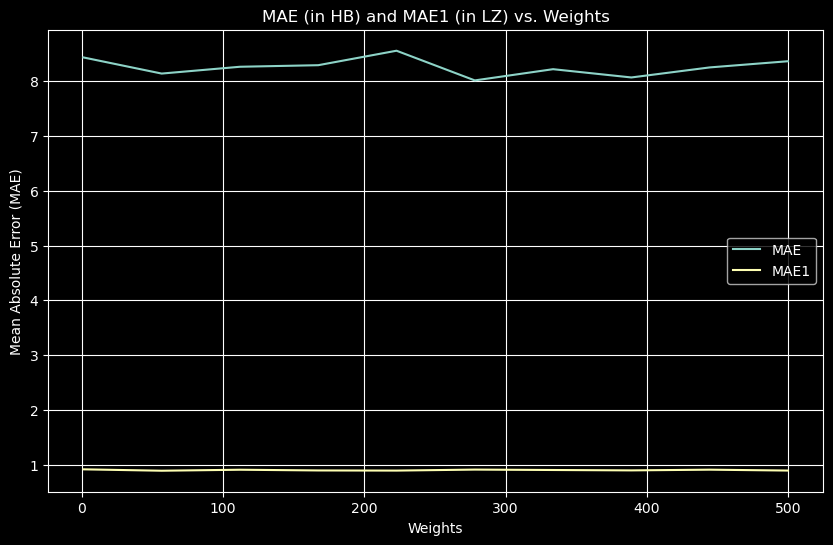

In [62]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Weight: 1.0, Avg. MAE: 5.165506802440462, Avg. MAE1: 0.9032452905932884
Weight: 56.44444444444444, Avg. MAE: 5.095316647790848, Avg. MAE1: 0.8999387724434058
Weight: 111.88888888888889, Avg. MAE: 4.974722190520863, Avg. MAE1: 0.9049855796252942
Weight: 167.33333333333331, Avg. MAE: 5.123296146734358, Avg. MAE1: 0.9106767117486352
Weight: 222.77777777777777, Avg. MAE: 5.126945793273903, Avg. MAE1: 0.8991669613583158
Weight: 278.22222222222223, Avg. MAE: 5.034812236851941, Avg. MAE1: 0.8976515124902439
Weight: 333.66666666666663, Avg. MAE: 5.259009941251838, Avg. MAE1: 0.8918355255659655
Weight: 389.1111111111111, Avg. MAE: 5.157457138156131, Avg. MAE1: 0.9088858981264654
Weight: 444.55555555555554, Avg. MAE: 5.241576060141803, Avg. MAE1: 0.8947337771272459
Weight: 500.0, Avg. MAE: 5.138421153306599, Avg. MAE1: 0.916214010798857
Best weight: 500.0, Best Avg. MSE: 5.138421153306599,
Train: 66 Test: 22 out of 88


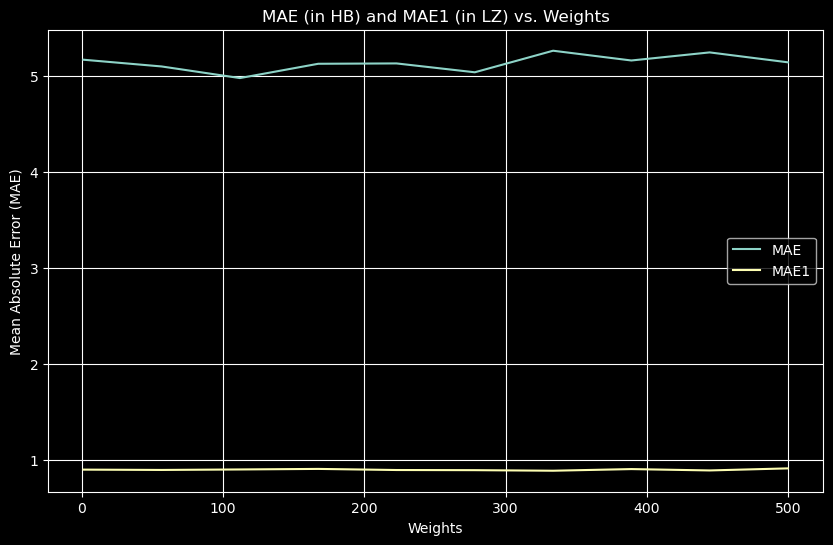

In [63]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y_val = y2.iloc[train_index], y2.iloc[val_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Bias: -0.42 vs -0.40 
MAE: 4.93 vs 4.91
R²: 0.43 vs 0.35


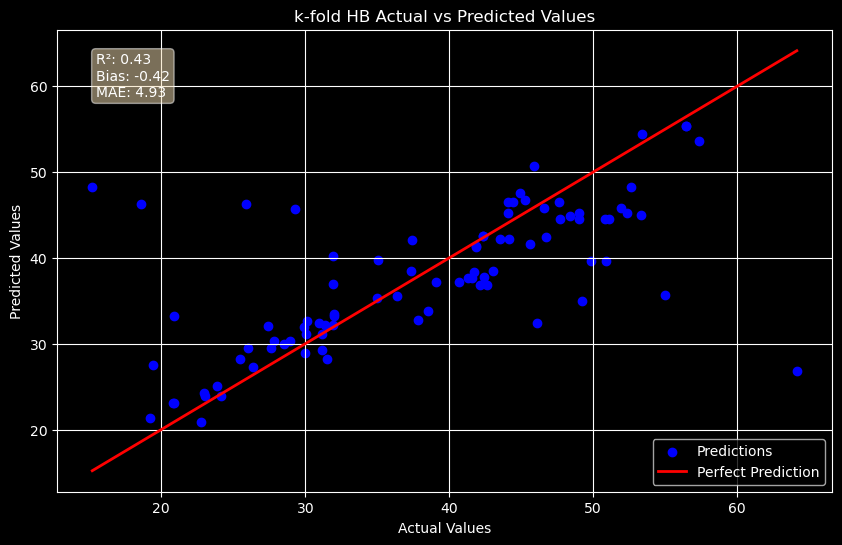

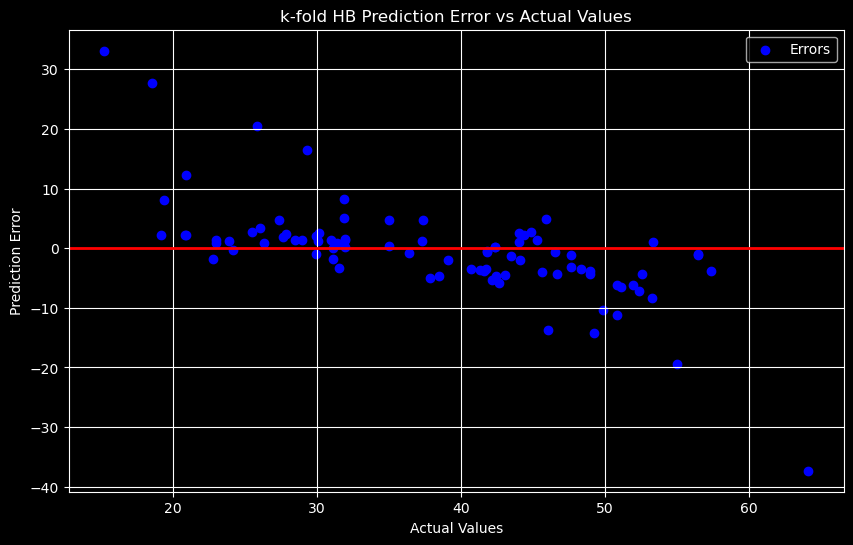

In [65]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()

    # Apply weights
    weights = np.ones(len(y_train))
    weights[len(y1):] *= weight
    model.fit(X_train, y_train,sample_weight=weights)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

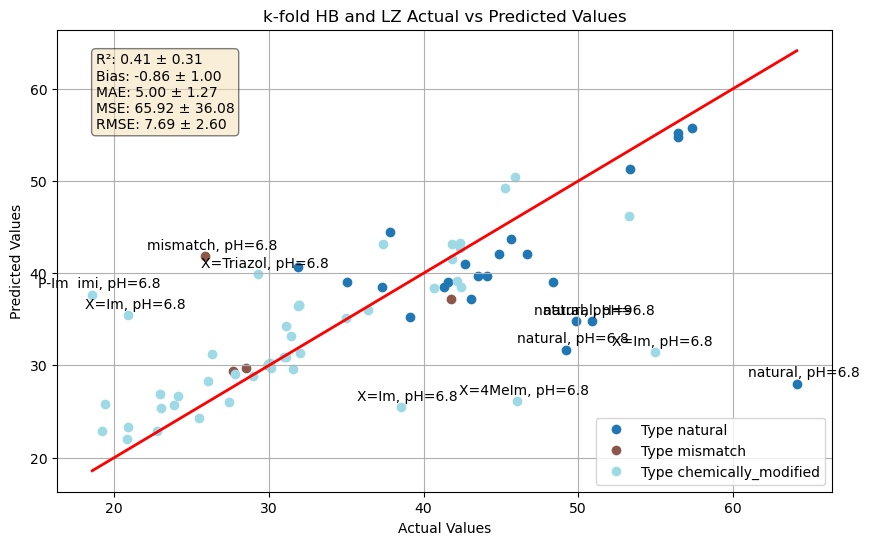

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


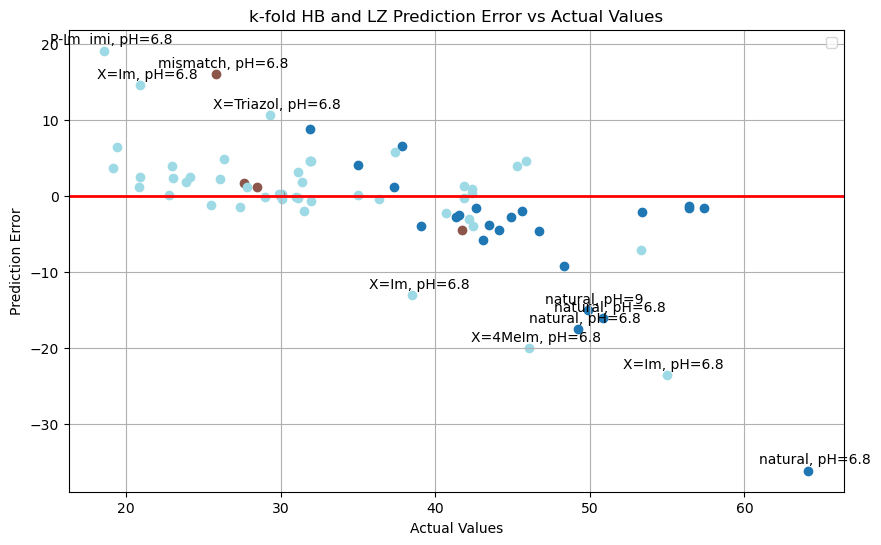

In [227]:
# Before 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

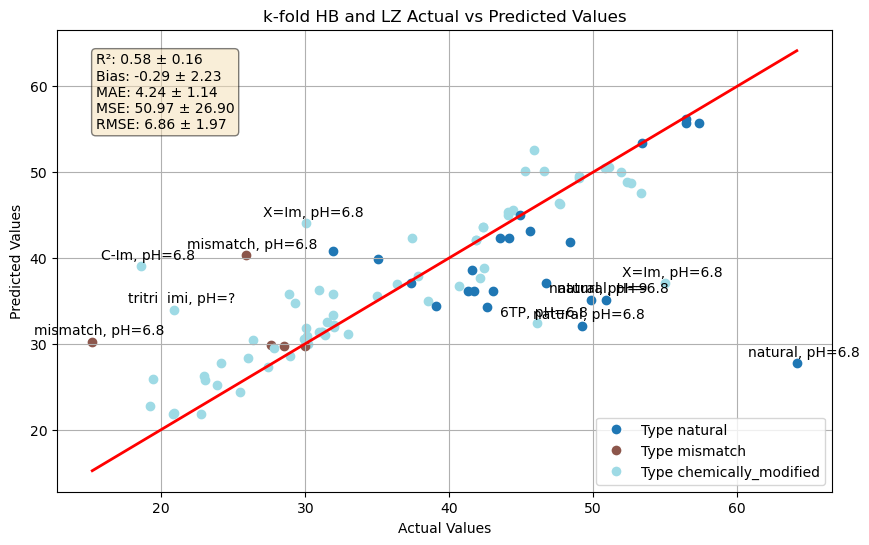

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


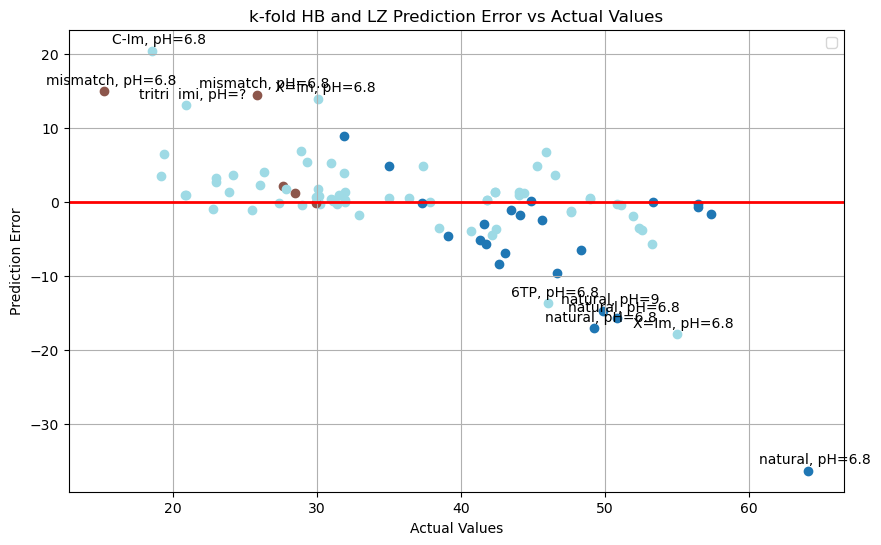

In [83]:
# after 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

# Just a CV with both datasets

Bias: 0.09 vs 0.09 
MAE: 2.96 vs 2.96
R²: 0.84 vs 0.84


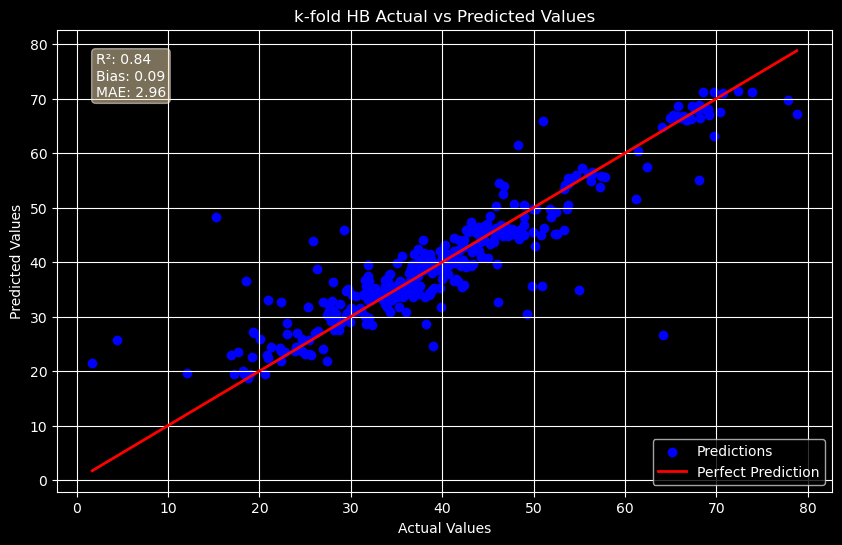

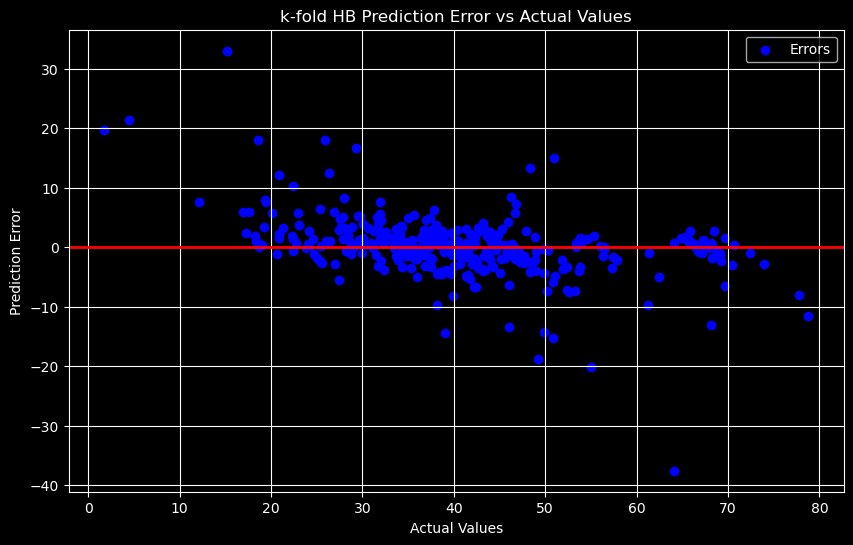

In [70]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']


X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()

    # Apply weights
    # weights = np.ones(len(y_train))
    # weights[len(y1):] *= weight
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

In [191]:
df_lz
df
df_all=pd.concat((df, df_lz), axis=0)
df_all=df_all.reset_index(drop=True)

,Tm,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,O_backbone-C_sugar,O_backbone-O_backbone,...,P_backbone-O_sugar,P_backbone-P_backbone,P_backbone-N_nucleobase,N_nucleobase-C_sugar,N_nucleobase-O_backbone,N_nucleobase-C_nucleobase,N_nucleobase-O_nucleobase,N_nucleobase-O_sugar,N_nucleobase-P_backbone,N_nucleobase-N_nucleobase
0,35.02,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
1,31.89,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
2,25.85,677,44,975,432,359,50,712,44,4,...,29,0,57,1323,257,1622,528,675,136,919
3,64.14,1122,74,1881,470,603,86,1639,72,7,...,50,0,152,1720,291,2245,460,870,163,1732
4,49.23,677,44,1014,433,359,50,759,44,4,...,29,0,62,1323,257,1659,529,675,136,983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.57,1059,70,2076,662,559,93,1460,68,7,...,53,0,145,1715,281,3090,975,867,190,1646
84,25.47,221,5,736,310,107,23,451,5,0,...,14,0,92,782,157,2739,855,402,152,1385
85,22.97,221,5,758,310,107,23,441,5,0,...,14,0,68,776,162,2432,684,395,126,1136
86,24.14,221,5,753,310,107,23,446,5,0,...,14,0,77,780,163,2439,694,399,133,1128


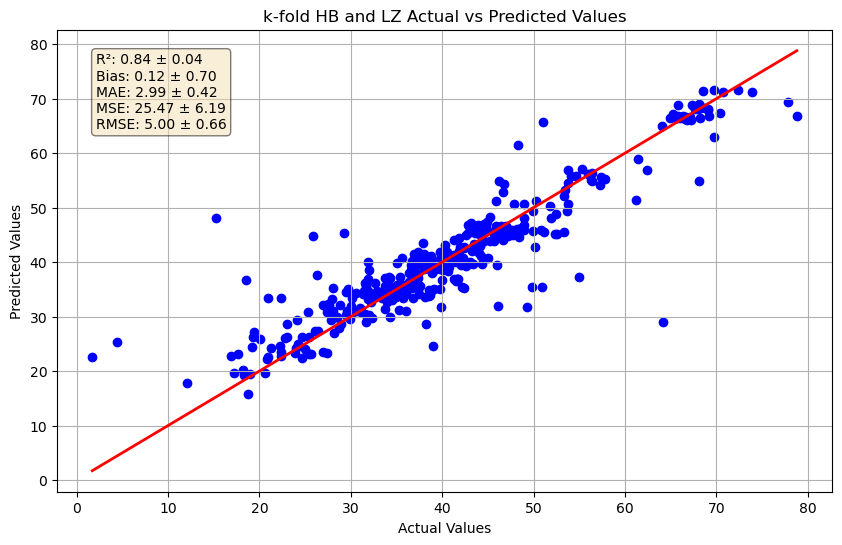

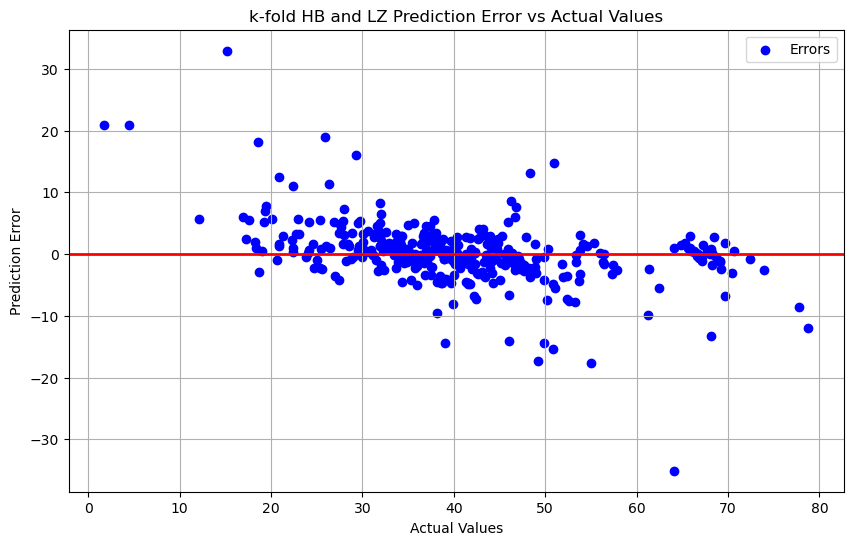

In [194]:
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']

X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_all[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# # Scatter plot with colors and annotations
# for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, pred, color=color)
#      # Check if the absolute difference is greater than 15
#     if abs(actual - pred) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, pred), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')

# Perfect prediction line
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_CV-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

# for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, error, color=color)
#      # Check if the absolute difference is greater than 15
#     if np.abs(error) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, error), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')


plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_CV-fold_HB_LZ_error_in_actual_value.png')
plt.show()

In [72]:
df['Tm']

0     35.02
1     31.89
2     25.85
3     64.14
4     49.23
      ...  
83    18.57
84    25.47
85    22.97
86    24.14
87    23.02
Name: Tm, Length: 88, dtype: float64